In [1]:
files_fanout = [
 'vgg_imagenette_qtrainTrue_fanout_True_l1loss1e-11_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-12_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-07_rescale5.0_prev.pth',
 'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-11_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_True_l1loss1e-10_rescale5.0_prev.pth',
#  'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-06_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-08_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_False_l1loss3e-07_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-10_rescale5.0.pth'
]

files_no_fanout = [
#  'vgg_imagenette_qtrainTrue_fanout_True_l1loss1e-11_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-12_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-07_rescale5.0_prev.pth',
#  'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-11_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_True_l1loss1e-10_rescale5.0_prev.pth',
 'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-06_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_False_l1loss1e-08_rescale5.0.pth',
 'vgg_imagenette_qtrainTrue_fanout_False_l1loss3e-07_rescale5.0.pth',
#  'vgg_imagenette_qtrainTrue_fanout_True_l1loss3e-10_rescale5.0.pth'
]

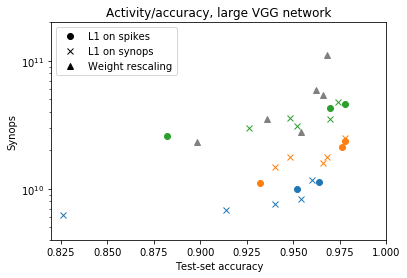

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


scales = [0.5, 1.0, 2.0]

for i, s in enumerate(scales):
    f = np.loadtxt(f'results_scale{s}_ndt10.txt', delimiter=',', dtype=str)
    for x in f:
        symbol = 'o' if x[0] in files_no_fanout else 'x'
        plt.plot(float(x[1]), float(x[2]), symbol, c=f'C{i}')
        
for i, s in enumerate([1., 2., 5., 10.]):
    f = np.loadtxt(f'results_smartrescale_scale{s}_ndt10.txt', delimiter=',', dtype=str)
    for x in f:
        plt.plot(float(x[1]), float(x[2]), '^', c='gray')

plt.plot(1.1, 10^10, 'ok', label='L1 on spikes')
plt.plot(1.1, 10^10, 'xk', label='L1 on synops')
plt.plot(1.1, 10^10, '^k', label='Weight rescaling')


plt.xlim([0.82, 1])
plt.ylim([4e9, 2e11])
plt.legend()
plt.yscale('log')
plt.title("Activity/accuracy, large VGG network")
plt.ylabel('Synops')
plt.xlabel('Test-set accuracy')
plt.savefig('vgg.pdf', bbox_inches='tight')